In [52]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

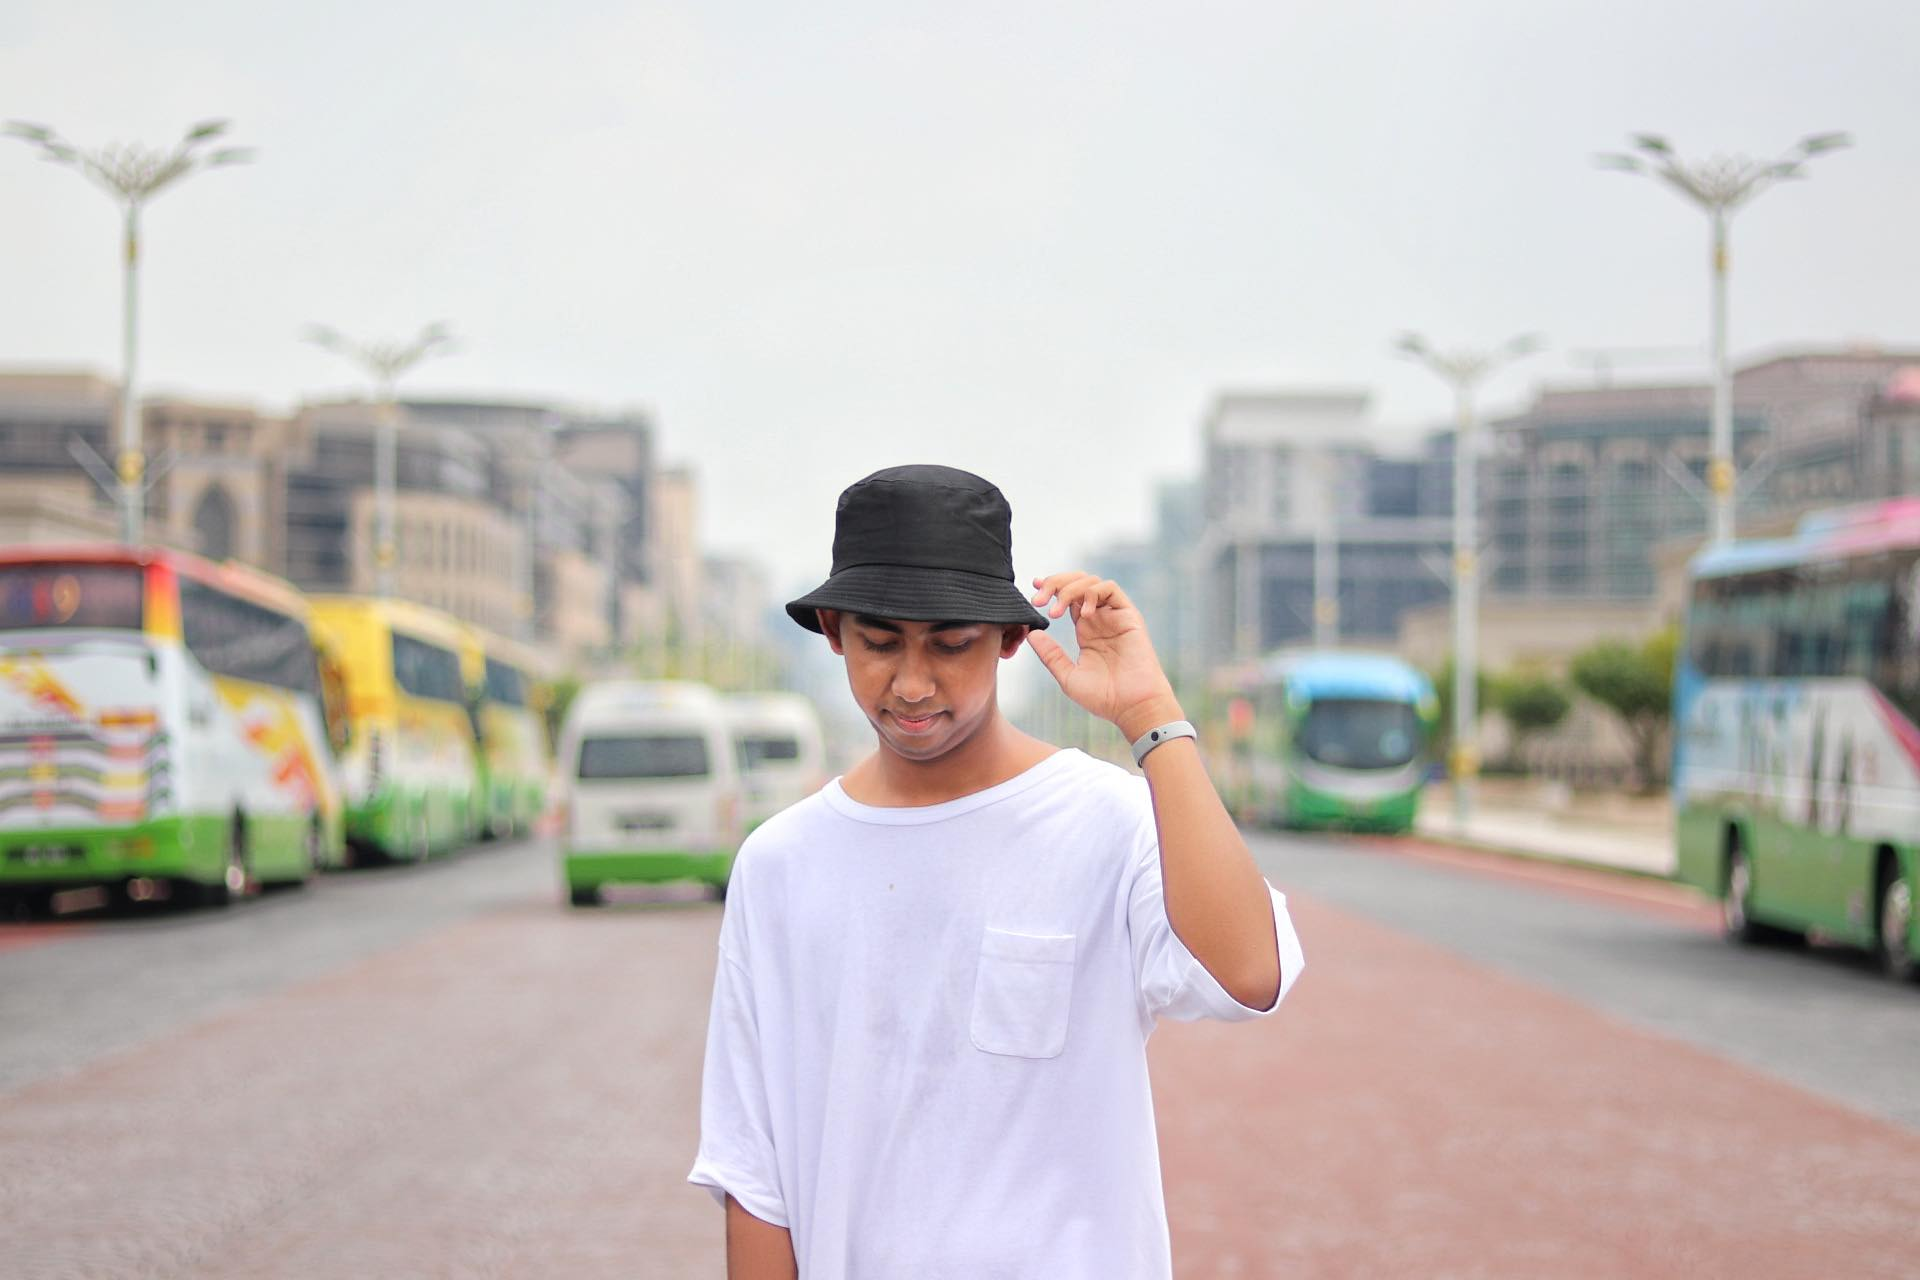

In [34]:
#การอ่านไฟล์รูปภาพ
img = cv2.imread('/content/OHM-KL.jpg')
cv2_imshow(img)

**Problem 1 : Program that can insert text (your name and ID) into your picture**

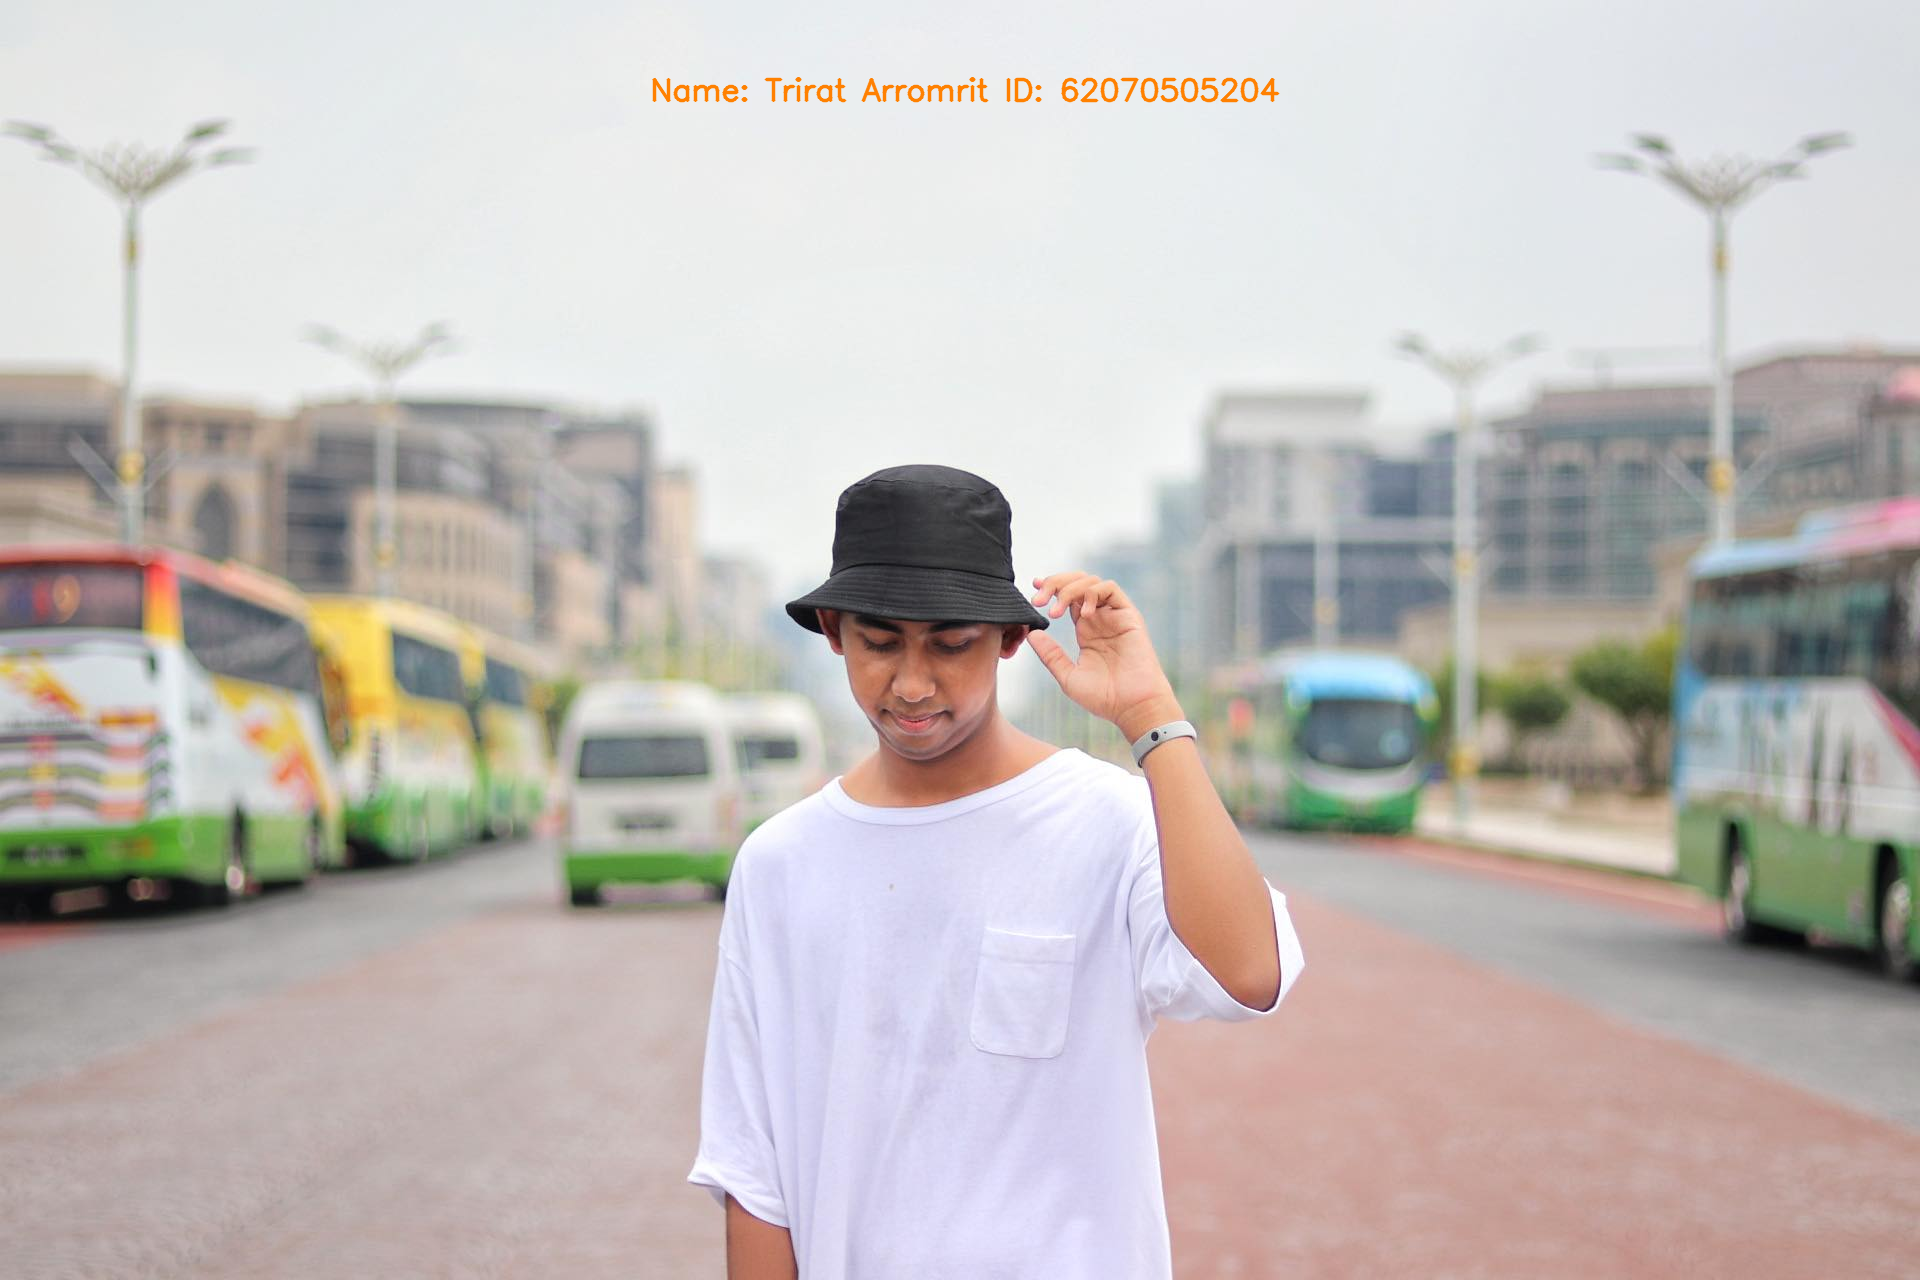

In [35]:
#การกำหนดรูปแบบของตัวอักษร
font = cv2.FONT_HERSHEY_SIMPLEX 
#ปรับตำแหน่งของข้อความที่แสดงบนรูปภาพ
org = (650,100)
#ขนาดของ Font ที่ใช้
fontScale = 1
#การเปลี่ยนของตัวอักษร Blue Green Red
color = (0, 128, 255)
#ความหนาของเส้นอักษร
thickness = 2

image_text = cv2.putText(img, 'Name: Trirat Arromrit ID: 62070505204' , org , font, 
                   fontScale, color, thickness, cv2.LINE_AA)
cv2_imshow(image_text)

**Problem 2 : Program of super resolution**

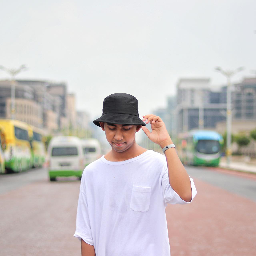

In [48]:
img2 = cv2.imread('/content/Square.jpg')
dim = (256,256)
re_img = cv2.resize(img2,dim)
cv2_imshow(re_img)

In [57]:
near_img = cv2.resize(re_img,(1024,1024), fx = 10, fy = 10, interpolation = cv2.INTER_NEAREST)
bilinear_img = cv2.resize(re_img,(1024,1024), fx = 10, fy = 10, interpolation = cv2.INTER_LINEAR)
bicubic_img = cv2.resize(re_img,(1024,1024), fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)

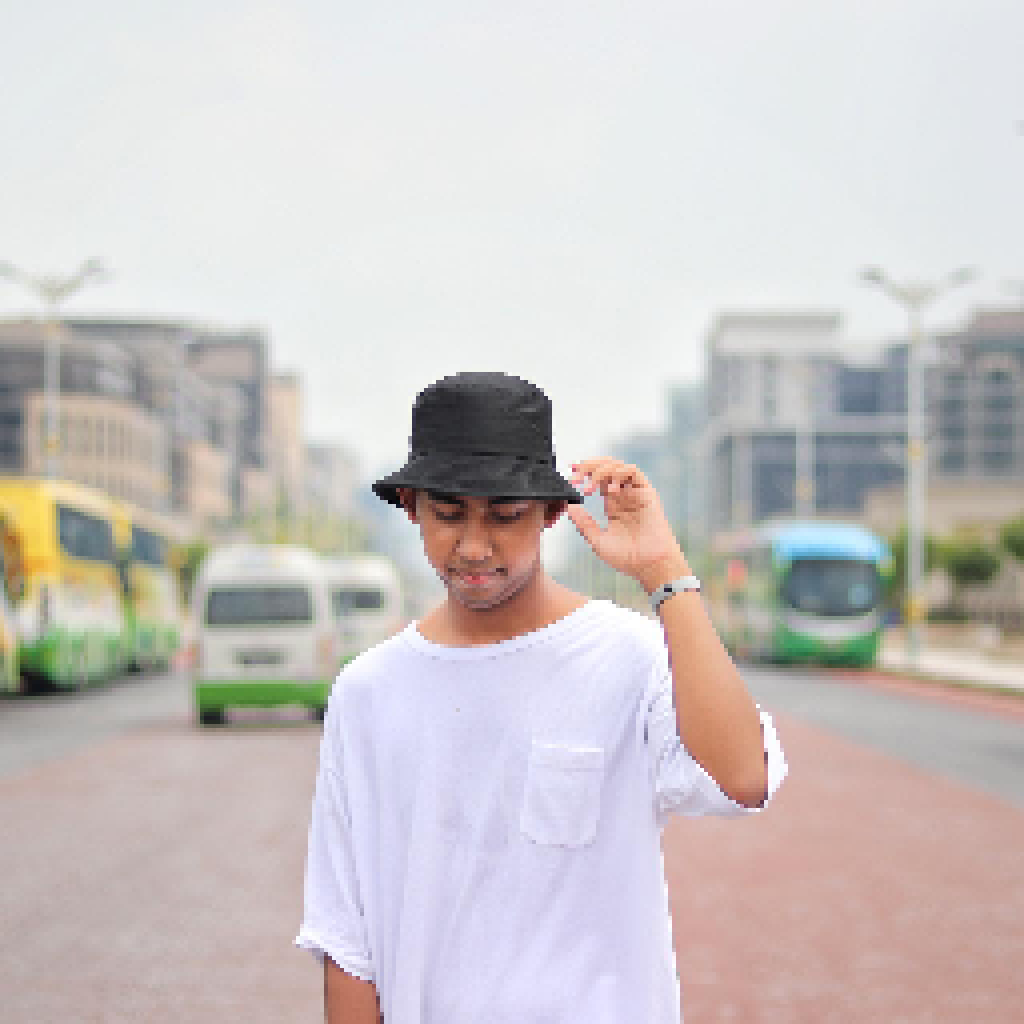

In [145]:
cv2_imshow(near_img)

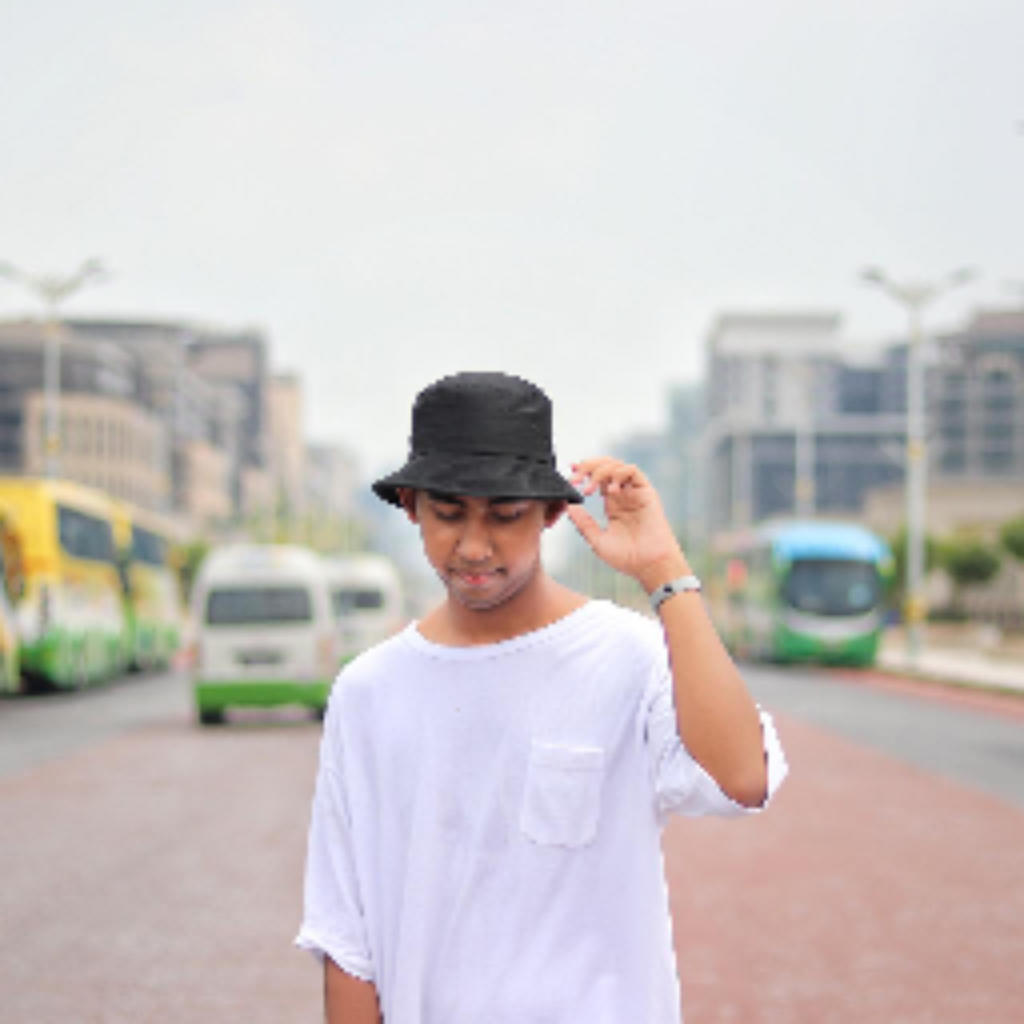

In [146]:
cv2_imshow(bilinear_img)

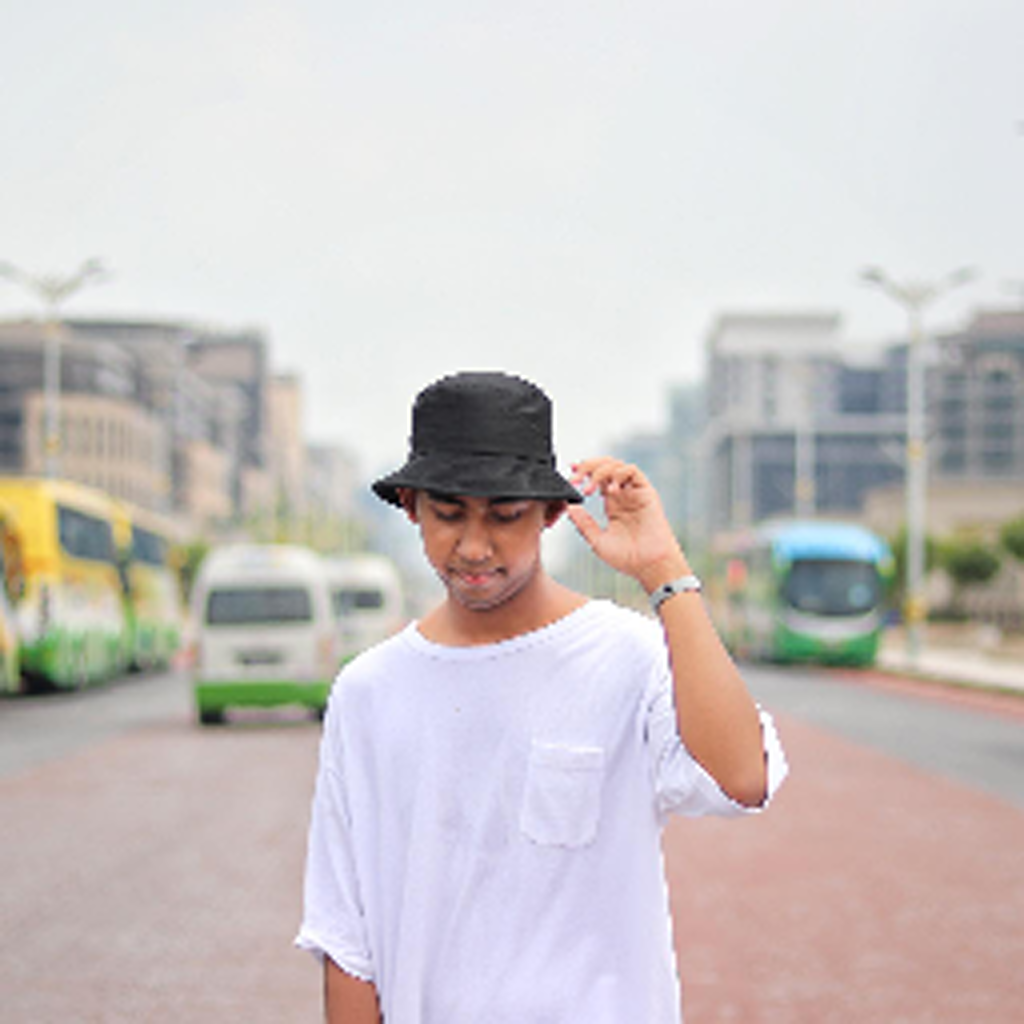

In [147]:
cv2_imshow(bicubic_img)

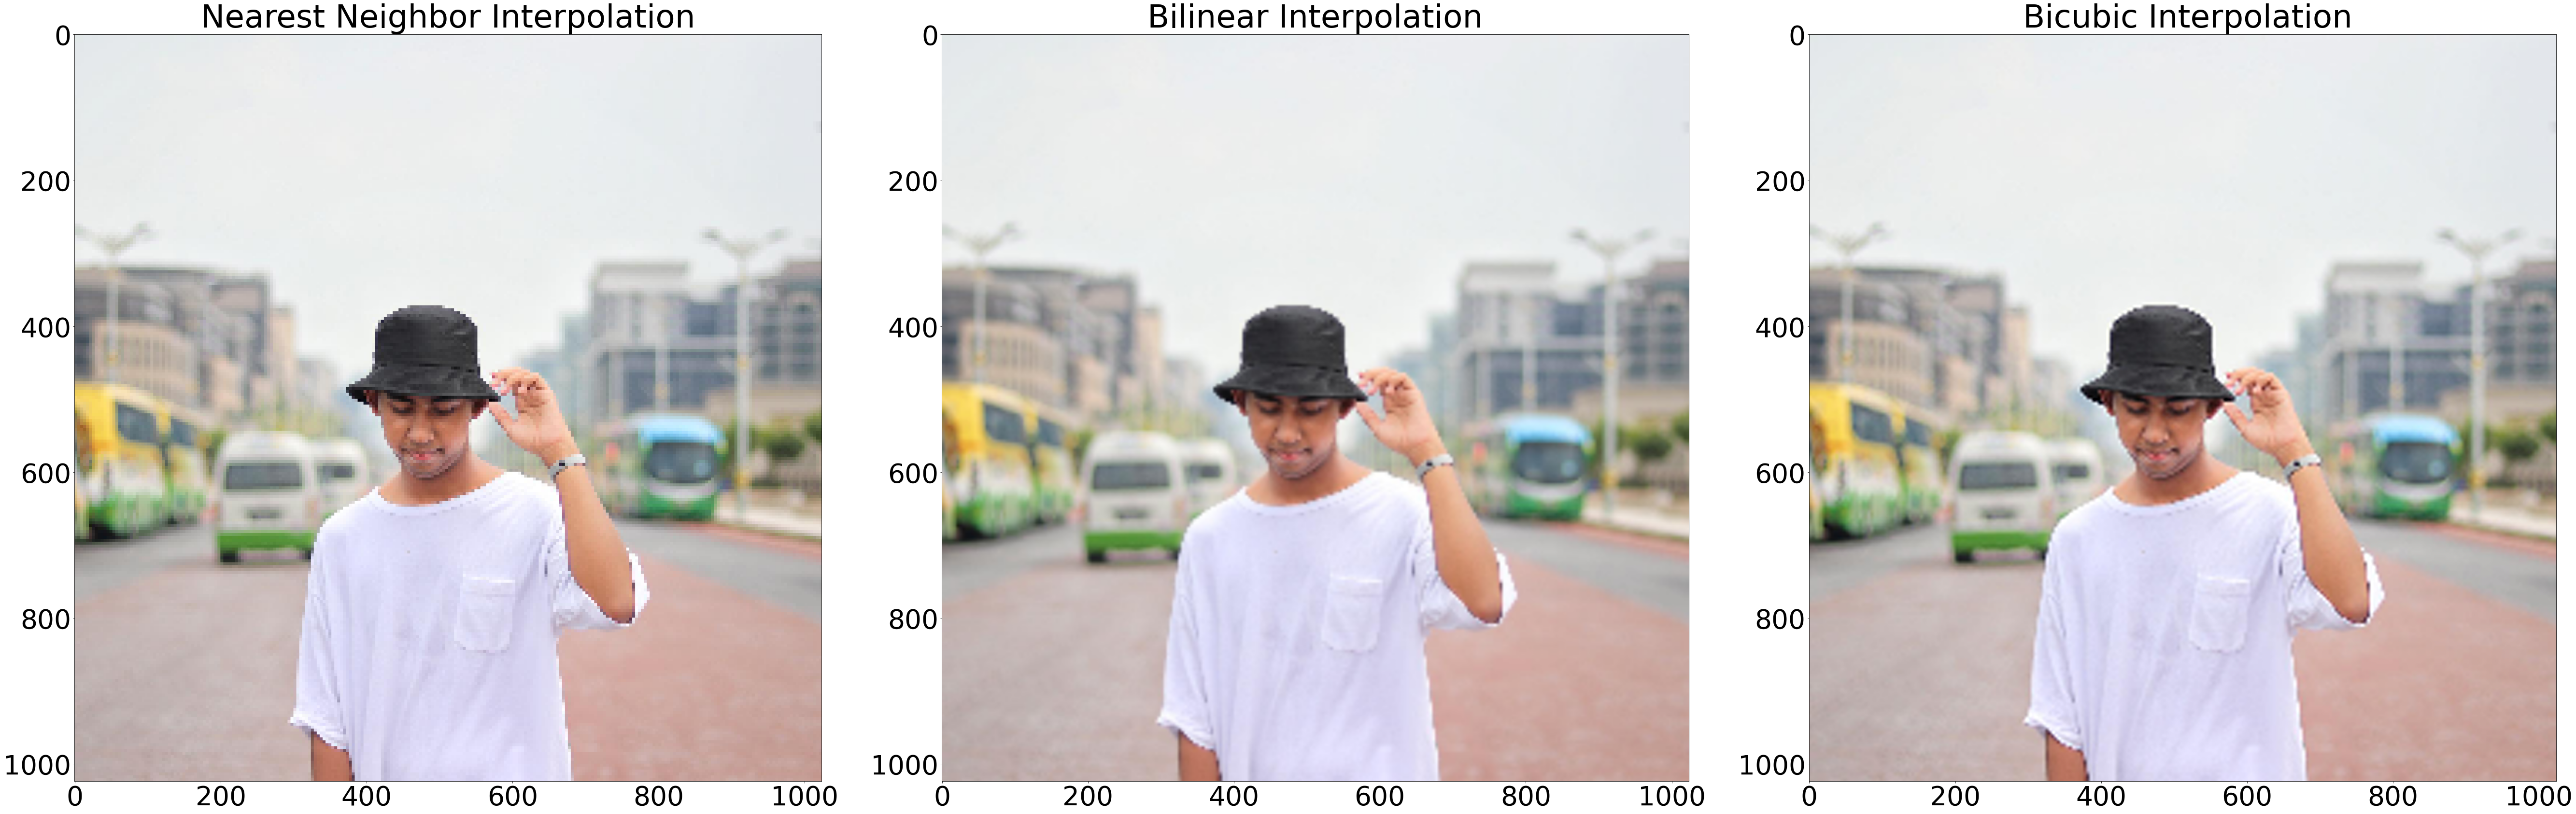

In [102]:
#การแสดงภาพทุกภาพให้อยู่ใน figure เดียวกัน
plt.rcParams["figure.figsize"] = [100.00, 100.00] #การกำหนดขนาดของ Figure
plt.rcParams["figure.autolayout"] = True #การกำหนดการจัดเรียงให้เป็นอัตโนมัติ
plt.rcParams.update({'font.size': 55}) #กำหนดขนาดของตัวอักษรที่แสดง
plt.subplot(1, 4, 1) #การกำหนดตำแหน่ง Suplot ที่ต้องการ
plt.title("Nearest Neighbor Interpolation") #การตั้งชื่อภาพ
plt.imshow(cv2.cvtColor(near_img, cv2.COLOR_BGR2RGB)) #การแสดงภาพให้อยู่ในรูปของ RGB 
plt.subplot(1, 4, 2)
plt.title("Bilinear Interpolation")
plt.imshow(cv2.cvtColor(bilinear_img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 4, 3)
plt.title(" Bicubic Interpolation")
plt.imshow(cv2.cvtColor(bicubic_img, cv2.COLOR_BGR2RGB))
plt.show() #คำสั่งแสดงภาพที่ plot ออกมา

จากภาพการทำ Image Interpolation ทั้ง 3 เทคนิค จะให้ผลลัพธ์ที่มีความแตกต่างกัน ซึ่งความคิดเห็นส่วนตัวของผม ผมคิดว่าการที่จะเลือกวิธีที่ดีที่สุด ก็อาจจะต้องพิจารณาที่วัตถุประสงค์ของงานนั้นๆ เช่น 


1.   หากต้องการภาพที่มีความเนียนหลังการแก้ไข อาจจะต้องใช้รูปแบบเทคนิค Bilinear Interpolation 
2.   หากต้องการให้เหลือความคมชัดของภาพหลังการแก้ไข อาจจะต้องใช้เทคนิค Nearest Neighbor Interpolation แต่ต้องระวังเกี่ยวกับปัญหา Checkerboard Effect
3.   และสุดท้ายเทคนิคที่ค่อนข้างอยู่ตรงกลางของทั้ง 2 แบบ คือ Bicubic Interpolation




**Problem 3 : Program of gray level resolution**

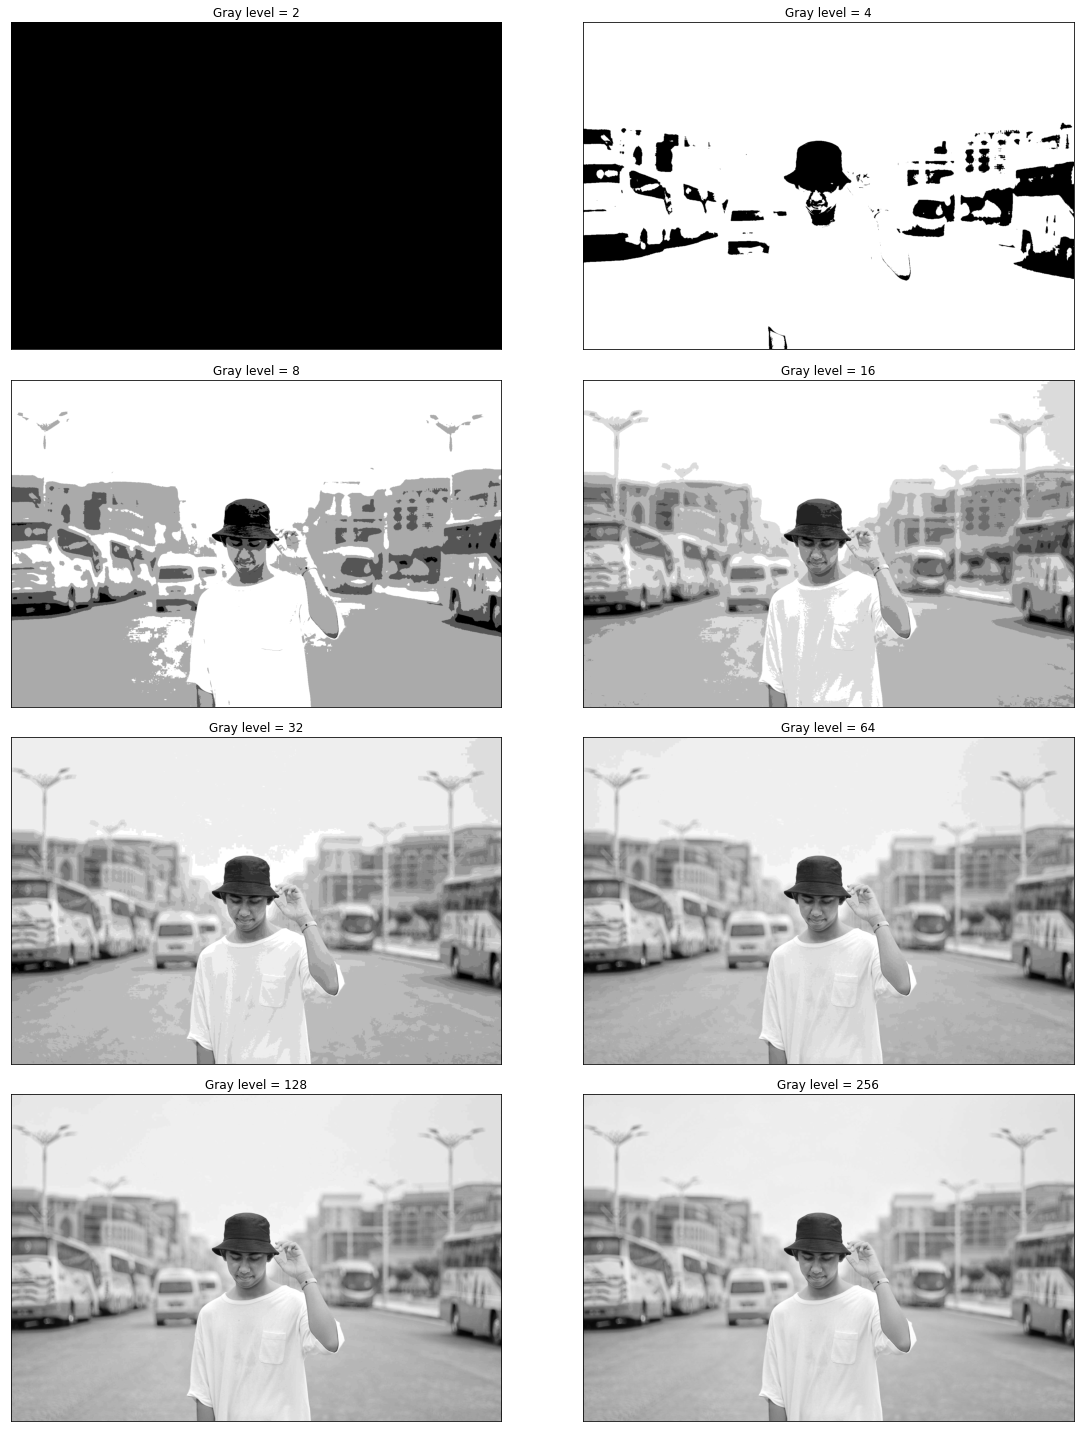

In [144]:
img = cv2.imread('/content/OHM-KL.jpg',0)
plt.rcParams["figure.figsize"] = [20.00, 20.00] #การกำหนดขนาดของ Figure
plt.rcParams.update({'font.size': 10}) #กำหนดขนาดของตัวอักษรที่แสดง
k=1
dir = 8
while (k<9):
  intensity_level = 2**k;
  current_compression = 256/intensity_level;
  img_reduced = np.uint8(np.floor(np.double(img)/intensity_level))
  l = current_compression-1
  norm_image = cv2.normalize(img_reduced,None,0,255,norm_type=cv2.NORM_MINMAX)
  plt.subplot(4, 2 ,dir)
  name = 2**dir
  plt.title("Gray level = " + str(name))
  plt.imshow(norm_image,'gray')
  plt.xticks([]),plt.yticks([])
  k = k+1
  dir = dir-1